(ch:oneD-data)=
# 1차원 데이터

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [5]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 데이터셋 불러오기

50명의 영어와 수학 점수를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
이때 학생번호를 인덱스로 지정한다.

In [6]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


**`head()`/`tail()` 메서드**

처음 5명의 점수는 다음과 같이 확인한다.

In [7]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


반면에 마지막 5명의 점수는 다음과 같이 확인한다.

In [8]:
df.tail()

,english,mathematics
student number,,
46,45,71
47,66,80
48,55,77
49,64,83
50,66,88


## 넘파이 어레이 활용

아래 코드는 처음 10명의 영어 점수로 구성된 넘파이 어레이를 지정한다.

- `head()`/`tail()` 함수: 정수 인자를 지정하면 지정된 개수의 샘플로 구성된 데이터프레임 반환.

In [9]:
first10english = df['english'].head(10)

scores = np.array(first10english)
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

:::{admonition} 넘파이 어레이
:class: tip

- 넘파이 어레이: 숫자로만 구성된 리스트와 유사하며, 데이터 분석 분야에서 가장 중요한 자료형이다.
- `np.array()` 함수: 리스트, 시리즈 등의 값을 어레이 자료형으로 변환시킨다.
:::

아래 코드는 처음 열 명의 이름을 A, B, C, ..., J로 지정하면서
열 명의 영어 점수로만 구성된 데이터프레임을 다음과 같이 지정한다.

In [10]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 데이터 대표값

주어진 데이터셋을 대표하는 값으로 평균값, 중앙값, 최빈값 등이 사용된다.

**평균값**

평균값은 데이터를 모두 더한 뒤, 데이터의 개수로 나눈다.

$$
\bar x = \frac 1 n \sum_{i=1}^{n} x_i = \frac 1 n (x_1 + x_2 + \cdots + x_n)
$$

10 명의 평균값은 다음과 같으며 3가지 방식으로 계산할 수 있다.

$$
\frac{42 + 69 + \cdots + 58}{10} = 55
$$

- 순수 파이썬

In [11]:
mean = sum(scores) / len(scores)
print("평균값:", mean)

평균값: 55.0


- 넘파이 어레이의 `mean()` 메서드 활용

In [12]:
np.mean(scores)

55.000000

- 데이터프레임의 `mean()` 메서드 활용

In [13]:
scores_df.mean()

score    55.0
dtype: float64

**중앙값**

중앙값은 데이터를 크기 순서대로 나열할 때 정확히 중앙에 위치한 값이다.
따라서 중앙값을 구하려면 먼저 값들을 크기순으로 정렬해야 한다.

In [14]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

정렬한 후에 데이터 개수 n이 짝수인지 홀수인지에 따라 중앙값을 지정한다.

- n이 홀수일 때: (n+1)/2 번째 데이터
- n이 짝수일 때: n/2 번째 데이터와 (n/2) + 1 번째 데이터의 평균값

따라서 10 명의 중앙값은 다음과 같다.

In [15]:
n = len(sorted_scores)

if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]

print("중앙값:", median)

중앙값: 56.5


- 넘파이 어레이의 `median()` 메서드 활용

In [16]:
np.median(scores)

56.500000

- 데이터프레임의 `median()` 메서드 활용

In [17]:
scores_df.median()

score    56.5
dtype: float64

**최빈값**

최빈값은 데이터에서 가장 많이 나타나는 값이다.
영어 점수에서 65가 두 번 나타나며 나머지 값은 한 번만 사용되었다.
따라서 65가 최빈값이다.
데이터프레임의 `mode()` 메서드를 이용하여 최빈값을 쉽게 확인할 수 있다.

In [18]:
scores_df.mode()

,score
0,65


## 데이터 분포

**편차**

각 데이터가 평균으로부터 떨어져 있는 정도를 **편차**<font size='2'>deviation</font>라 한다.
즉, 편차는 데이터들이 평균값으로부터 떨어져 있는 정도를 평가한다.

열 명 각 학생의 성적 편차는 다음과 같이 계산된다.

In [19]:
mean = np.mean(scores)
print('scores의 평균값:', mean)

deviation = scores - mean
deviation

scores의 평균값: 55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

:::{admonition} 어레이 연산과 브로드캐스팅<font size='2'>broadcasting</font>
:class: tip

어레이의 연산은 기본적으로 항목 단위로 이루어짐에 주의한다.
:::

평균값이 같은 데이터라 하더라도 편차는 많이 다를 수 있다.
예를 들어 다음 10명의 편차는 이전 10명의 편차보다 상대적으로 많이 작다

In [20]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]

another_mean = np.mean(another_scores)
print('another_scores의 평균값:', another_mean)

another_deviation = another_scores - another_mean
another_deviation

another_scores의 평균값: 55.0


array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

두 데이터셋의 편차를 각각 그림으로 나타내면 `another_scores`에 포함된 데이터들의 편차가 보다 작음을
바로 알아챌 수 있다.

- `scores` 데이터들의 편차

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/ch02/img-2-1.jpg" style="width:600px"></div></p>

- `another_scores` 데이터들의 편차

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/ch02/img-2-2.jpg" style="width:600px"></div></p>

편차들의 평균값은 항상 0이기에 편차를 대표하는 값은 별 의미가 없다.

In [21]:
np.mean(deviation)

0.000000

In [22]:
np.mean(another_deviation)

0.000000

데이터프레임을 이용하여 동일한 결과를 확인할 수 있다.

아래 코드는 `scores_df` 데이터프레임을 복제해서 새로
생성한 데이터프레임에 편차 데이터를 추가한다.

In [23]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation

summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


`mean()` 메서드에 의해 편차들의 평균값이 0임이 다시 한 번 확인된다.

In [24]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

**분산**

편차들의 평균값이 항상 0이기에 데이터 분포도의 측정 용도로 사용하기에는 바람직하지 않다.
편차는 음의 값도 갖는다.
하지만 분포도는 평균값을 기준으로 데이터들이 떨어져 있는 정도를 측정해야 하기에 
항상 양의 값으로 측정되는 게 맞다.
이런 의미에서 편차의 제곱의 평균값을 분포도 측정 기준으로 사용한다.

**분산**<font size='2'>variance</font>는 편차의 제곱의 평균값을 가리킨다.

$$
S^2 = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2 = \frac 1 n \left\{(x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \cdots + (x_n - \bar x)^2 \right \}
$$

예를 들어 `scores`에 포함된 데이터들의 분산은 다음과 같다.

$$
S^2 = \frac{1}{10} \left\{ (42-55)^2 + (69-55)^2 + \cdots + (58-55)^2 \right\} = 86
$$

In [25]:
np.mean(deviation ** 2)

86.000000

- 넘파이의 `var()` 함수 활용

In [26]:
np.var(scores)

86.000000

데이터프레임의 `var()` 메서드 활용해도 된다.
하지만 `ddof=0` 키워드 인자를 활용하여 (편향된) 표본분산<font size='2'>sample variance</font>을 계산해야 함에 주의한다.
표본분산을 편향분산<font size='2'>biased variance</font>이라 부르기도 한다.

In [27]:
scores_df.var(ddof=0)

score    86.0
dtype: float64

`ddof` 키워드 인자를 생략하면 `ddof=1`로 지정된 기본 옵션이 실행되며
불편분산<font size='2'>unbiased variance</font>, 즉 편향되지 않은 표본분산을 계산한다.
불편분산의 용도는 나중에 배운다.

In [28]:
scores_df.var()

score    95.555556
dtype: float64

In [29]:
scores_df.var(ddof=1)

score    95.555556
dtype: float64

참고로 `np.var()` 함수 또한 `ddof` 키워드 인자를 사용하며 기본값은 데이터프레임의 경우와는 달리 0으로
지정되어 있어서 기본적으로 편향분산을 계산한다.

In [30]:
np.var(scores, ddof=0)

86.000000

`ddof=1`로 지정하면 불편분산을 계산한다.

In [31]:
np.var(scores, ddof=1)

95.555556

:::{admonition} 편향분산 vs. 불편분산
:class: note

불편분산을 이해하려면 먼저 모집단과 표본 개념을 이해해야 한다.

- 모집단: 분석 대상 모든 데이터. 예를 들어 전 세계인들의 몸무게
- 표본: 분석 대상 일부 데이터. 예를 들어, 세계 국가별 100명을 무작위로 선택.
- 모분산: 모집단의 분산
- 표본분산:  표본의 분산

모집단 데이터는 일반적으로 구하기가 매우 어렵거나 불가능할 수 있으다.
따라서 모평균과 모분산은 표본들의 평균값과 분산으로 적절한
신뢰도와 함께 추정된다.

표본분산을 계산할 때 표본에 포함된 데이터 샘플의 개수 n 대신 n-1 을 이용하면
보다 정확한 모분산 추정값이 된다는 것이 수학적으로 증명된다.
일반적으로 데이터셋이 커질 수록 분산도 함께 증가하기에
n 대신에 n-1로 나누는 게 상식적으로도 의미있다.
보다 자세한 설명은 [불편추정량에 대한 고백](https://recipesds.tistory.com/entry/왜-표본분산은-n-1로-나누죠-자유도-불편추정량에-대한-고백)에서 찾아볼 수 있다.
:::

아래 코드는 편차의 제곱을 새로운 변수 `summary_df`가 가리키는 데이터프레임의 새로운 특성(변인)으로 추가한다.

In [30]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


각 특성의 평균값을 계산하면 앞서 `scores`에 포함된 데이터들의 평균값, 편차 평균값, 분산이 확인된다.

In [31]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

**분산과 정사각형의 면적**

편차 제곱을 한 변의 길이가 편차인 정사각형의 면적으로 간주할 수 있다.
그러면 분산은 정사각형 면적의 평균값이 된다.
아래 그림은 A, B, C, D 명을 대상으로 하는 데이터의 평균점수와 분산을 보여준다.

- 4개의 회색 정사각형: A, B, C, D 4개 데이터 각각에 대한 편차의 제곱
- 옅은 하늘색 정사각형: 4개 데이터의 분산

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch02/img-2-3.jpg?raw=true" style="width:600px"></div></p>

실제로 A, B, C, D의 평균값은 52이며 분산은 다음과 같이 계산된다.

In [32]:
ABCD = scores[:4]
ABCD

array([42, 69, 56, 41])

In [33]:
print("A, B, C, D의 평균값:", ABCD.mean())

A, B, C, D의 평균값: 52.0


In [34]:
print("A, B, C, D의 평균값:", ABCD.var())

A, B, C, D의 평균값: 131.5


**표준편차**

분산은 편차의 제곱을 다루기에 원래 데이터에 사용된 단위가 아닌 해당 단위의 제곱을 사용한다.
앞서 보았듯이 정사각형의 한 변의 길이와 면적은 엄연히 단위가 다르다.

동일한 단위로 데이터의 분포도를 표현하기 위해 분산의 제곱근인 **표준편차**<font size='2'>standard deviation</font>를
많이 활용한다.

$$
S = \sqrt{S^2} = \sqrt{\frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2}
$$

10명 점수의 표준편차는 넘파이의 제곱근 함수인 `np.sqrt()`를 이용한다.

In [35]:
np.sqrt(np.var(scores, ddof=0))

9.273618

넘파이의 `np.std()` 함수를 바로 이용할 수도 있다.
단, 데이터프레임의 `var()` 메서드에서처럼 `ddof=0` 옵션을 함께 지정해야 한다.

In [36]:
np.std(scores, ddof=0)

9.273618

**범위**

**범위**<font size='2'>range</font>는 데이터의 최댓값과 최솟값의 차이를 가리킨다.

$$
Rg = x_{\max} - x_{\min}
$$

`scores`에 포함된 데이터의 범위는 28이다.

In [37]:
np.max(scores) - np.min(scores)

28

범위는 최댓값과 최소값이 변하면 그에 따라 값이 크게 요동칠 수 있다.
따라서 범위 대신 데이터의 변화에 덜 민감한 사분범위를 주로 활용한다.

**사분위수와 사분범위**

데이터의 하위 25%, 50%, 75%에 위치하는 값을 
각각 제1사분위수(Q1), 제2사분위수(Q2), 제3사분위수(Q3)라 한다.
Q2는 앞서 살펴본 중앙값에 해당한다.

**사분범위**<font size='2'>interquartile range</font>는 제3사분위수에서 제1사분위수를 뺀 값이다.
아래 코드가 `scores`의 사분범위를 계산한다.
`np.percentile()` 함수는 지정된 %에 해당하는 값을 반환한다.

In [38]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000000

**상자 그림**

상자 그림은 데이터의 범위, 사분위수, 사분범위를 동시에 보여준다.
상자 그림은 다음 값들을 다양한 방식으로 표시한다.
위에서부터 사용된 값들은 다음과 같다.

- 너무 큰 이상치에 해당하는 점들
- (Q3 + 1.5 * IQR) 해당하는 곳의 수평 선분
- Q3, Q2, Q1에 해당하는 값을 이용한 직사각형
- (Q1 - 1.5 * IQR) 해당하는 곳의 수평 선분
- 너무 작은 이상치에 해당하는 점들

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/ch02/img-2-8.jpg" style="width:250px"></div></p>

`scores`에 포함된 값들의 분포도를 아래 코드를 이용하여 상자 그림으로 그리면 다음과 같다.
그래프를 그리기 위해 먼저 데이터 시각화 관련 라이브러리를 불러와야 한다.
보통 `matplotlib.pyplot`를 활용한다.
아래 코드는 해당 라이브러리를 `plt`라는 별칭으로 불러온다.

In [39]:
import matplotlib.pyplot as plt

이제 데이터프레임의 `boxplot()` 메서드를 이용하여 상자 그림을 그릴 수 있다.
아래 코드는 `summary_df`가 가리키는 데이터프레임의 `score` 특성에 포함된 값들을 대상으로
상자 그림을 그린다.

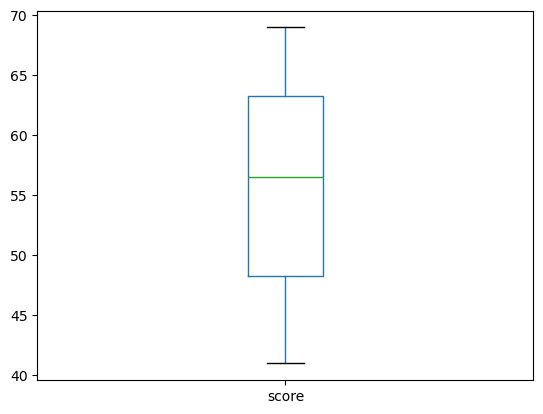

In [40]:
summary_df.boxplot(column=['score'], grid=False)
plt.show()

**데이터프레임의 `describe()` 메서드**

데이터프레임의 `describe()` 메서드는
상자 그림에 포함된 정보를 담고있는 데이터프레임을 생성한다.

In [41]:
scores_df = summary_df[['score']]
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


(sec:scaling)=
## 데이터 정규화

데이터 분석을 진행할 때 경우에 따라 데이터셋의 특성값들의 
**스케일**<font size="2">scale</font>을 비슷하게 조정할 필요가 있다.
특성의 스케일을 조정하는 과정을 **스케일링**<font size="2">scaling</font>이다.

스케일링은 보통 아래 두 가지 방식을 사용한다. 

- min-max 스케일링
- 표준화

**min-max 스케일링**

min-max 스케일링은 아래 식을 이용하여 특성값 $x$를 0에서 1 사이의 값으로 변환한다.
$max$ 와 $min$ 은 각각 해당 특성값들의 최댓값과 최솟값을 가리킨다. 

$$
\frac{x-min}{max-min}
$$

min-max 스케일링은 이상치에 매우 민감하다.
예를 들어 이상치가 매우 크면 분모가 분자에 비해 훨씬 크게 되어 변환된 값이 0 근처에 몰리게 된다.

아래 코드는 `scores`에 포함된 10개의 점수에 대해 min-max 스케일링을 적용한다.

In [42]:
minmax = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
minmax

array([0.035714, 1.      , 0.535714, 0.      , 0.571429, 0.25    ,
       0.857143, 0.285714, 0.857143, 0.607143])

최솟값은 0, 최댓값은 1이 되었다.

In [43]:
np.min(minmax), np.max(minmax)

(0.000000, 1.000000)

**표준화**

표준화<font size='2'>standardization</font>는 아래식을 이용하여 특성값 $x$를 변환한다.
$\bar x$ 와 $S$ 는 각각 해당 특성값들의 평균값과 표준편차를 가리킨다.

$$
\frac{x-\bar x}{S}
$$

변환된 특성은 평균값은 0, 표준편차는 1인 분포를 따르며, 이상치에 상대적으로 덜 영향을 받는다.

In [44]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.401826,  1.509659,  0.107833, -1.509659,  0.215666, -0.754829,
        1.078328, -0.646997,  1.078328,  0.323498])

평균값은 (거의) 0, 표준편차는 (거의) 1이 되었다.

In [45]:
np.mean(z), np.std(z, ddof=0)

(-0.000000, 1.000000)

:::{admonition} 부동소수점 연산
:class: note

부동소수점 연산은 기본적으로 약간의 오차를 갖는다.
예를 들어 위 결과에서 `-0.000000`로 표기된 이유는 평균값이 정확하게 0이 아니라 0에 매우 가까운 음의 유리수이기 때문이다.
여기서는 소수점 이하 여섯째 자리까지 표기되어 그렇게 보이는 것뿐이지 정확히 0은 아니라는 의미다.

반면에 이론적으로는 표준화된 데이터의 평균값은 정확히 0이어야 한다.
하지만 컴퓨터를 이용한 부동소수점 연산은 수학 계산과 일반적으로 조금의 오차를 갖는 한계를 갖는다.
이는 프로그래밍 언어의 문제가 아니라 컴퓨터 자체의 한계라는 정도만 기억해두면 좋다.
부동소수점 연산의 오차 크기는 컴퓨터 사용환경에 따라 달라지며 이런 이유로 유리수가 아닌 부동소수점이라 불린다.
:::

**데이터프레임 활용**

아래 코드는 정규화된 값을 `scores_df` 데이터프레임에 새로운 특성으로 추가한다.

In [46]:
scores_df.loc[:, 'score_minmax'] = minmax

In [47]:
scores_df.loc[:, 'score_standardized'] = z

추가된 특성을 확인하면 다음과 같다.

In [48]:
scores_df

,score,score_minmax,score_standardized
student,,,
A,42,0.035714,-1.401826
B,69,1.000000,1.509659
C,56,0.535714,0.107833
D,41,0.000000,-1.509659
E,57,0.571429,0.215666
F,48,0.250000,-0.754829
G,65,0.857143,1.078328
H,49,0.285714,-0.646997
I,65,0.857143,1.078328


`describe()` 메서드를 활용하면 정규화된 각각의 값들의 분포를 한 눈에 살펴볼 수 있다.
특히 표준화된 데이터의 평균값이 정확히 0이 아니라 소수점 이하 17째 자리에 1이 위치함을 알 수 있다.

참고로 `-1.665335e-17`은 `-1.665335 * (10의 -17승)`, 즉 `0.00000000000000001665335`을 의미하며
매우 큰, 또는 0에 매우 가까운 숫자를 위한 과학적 표기법을 사용한다.
과학적 표기법에 대한 간단한 설명은 [지수 표기법](https://velog.io/@rudi/지수-표기법Exponential-notation)을 참고한다.

In [49]:
scores_df.describe()

,score,score_minmax,score_standardized
count,10.000000,10.000000,1.000000e+01
mean,55.000000,0.500000,-1.665335e-17
std,9.775252,0.349116,1.054093e+00
min,41.000000,0.000000,-1.509659e+00
25%,48.250000,0.258929,-7.278712e-01
50%,56.500000,0.553571,1.617492e-01
75%,63.250000,0.794643,8.896204e-01
max,69.000000,1.000000,1.509659e+00


## 연습문제

참고: [(연습) 1차원 데이터](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-oneD_data.ipynb)